# <center> KNN FROM SCRATCH: Recherche des k plus proches voisins</center>
<center> 
BOUSHAB Rida<br>
Data SCIENCE 

</center>

# Sommaire

**1) Importation des packages**<br>
**2) Fonctions**<br>
**3) Première dataset: load_wine()**<br>
**4) Deuxième dataset:load_digits()**<br>
**5) Troisieme dataset(Real): fetch_covtype()**<br>
**6) Conclusion**

Warning: pour l'execetion de ce fichier ca peut prendre quelque heures, parce que le programme essaye de trouver le bon
nombre de random state(rsf):

Si vous voudriez pas attendre beaucoup de temps il faut que vous commenté la partie du bon rondom state pour chaque dataset et affecter ces valeurs que j'ai trouvé pour chaque data set:
pour:<br>
3) il faut affecter a rsf=16584<br>
4) il faut affecter a rsf=5695<br>
5)il faut affecter a rsf=22<br>

Sinon Ne preniez pas ce avertissement comme une consideration.

## 1) Importation des packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random as rd
import cProfile, pstats, io 
from math import sqrt
import time
!pip install tabulate
from tabulate import tabulate
from sklearn import datasets
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from collections import Counter

## 2) Fonctions:

**Fonction Chargement des data sets**

In [2]:
"""Cette Fonction retourne une dataFrame en specifiant les colonnes"""
def sklearn_to_df_0(sklearn_dataset):
    # Création dataFrame, colonnes caractéristiques (valeurs et étiquettes)
    df = pd.DataFrame(data=sklearn_dataset.data,
    columns=sklearn_dataset.feature_names)
    # Ajout colonne variable à estimer
    df['target'] = sklearn_dataset.target
    return df

In [3]:
"""Cette Fonction retourne une dataFrame en specifiant pas les colonnes"""
def sklearn_to_df_1(sklearn_dataset):
        # Création dataFrame
    df = pd.DataFrame(data=sklearn_dataset.data)
    # Ajout colonne variable à estimer
    df['target'] = sklearn_dataset.target
    return df

**Cprofile**

In [4]:
def profile(fnc):
    
    
    """Il décompose tout les lignes dans une  méthode dans le script, il vous dit:

    ncalls : Le nombre de fois qu'une méthode a été appelée
    tottime : Temps total passé dans la fonction donnée (hors temps passé dans les appels aux sous-fonctions)
    percall : temps passé par appel. Ou le quotient de tottime divisé par les appels
    cumtime : Le temps cumulé passé dans cette sous-fonction et toutes les sous-fonctions (de l'invocation à la sortie). Ce chiffre est précis même pour les fonctions récursives.
    percall : est le quotient de cumtime divisé par des appels primitifs
    filename:lineno(function) : fournit les données respectives de chaque fonction
    Le cProfiler peut être facilement appelé sur la ligne de commande en utilisant: @profile
    """
    
    def inner(*args, **kwargs):
        
        pr = cProfile.Profile()
        pr.enable()
        retval = fnc(*args, **kwargs)
        pr.disable()
        s = io.StringIO()
        sortby = 'cumulative'
        ps = pstats.Stats(pr, stream=s).sort_stats(sortby)
        ps.print_stats()
        print(s.getvalue())
        return retval

    return inner

**rondom state fonctions:**

In [5]:
"""La fonction prend en parametre k_range qui est un entiers qui prend 20 valeur impaire
    et le parametre j qui est le nombre de combinaison pour le random state.
    *A l'interieur de la fonction:
    On  Construit des ensembles d'apprentissage et de test En général, 20 % des données pour le test et la même proportion pour chaque classe.
    Apres on appelle le mode knn de sklearn avec la fonction KNN_Scikit(voir detail de cette fonction en dessous!)
"""
"""Cette Fonction retourne le taux de justesse du modele knn de Sklearn(KNN_Scikit) pour un random state données"""
def rs_learn(k_range,j):
    xy_train, xy_test, lab_train, lab_test = train_test_split(a, classe, test_size=0.2, random_state=j,
    stratify=classe)
    scores_list=[kNN_Scikit(k,xy_train, lab_train, xy_test, lab_test) for k in k_range]
    taux_sk=[scores_list[i][0] for i in range(len(scores_list)) ]
    return taux_sk

In [6]:
"""Cette Fonction prend en parametere(r) le nombre de combinaison du random state"""
"""A l'interieur: On appele la fonction rs_learn afin de retourner le taux de justesse apres 
                    Apres on affecte a la liste cn le taux de justesse le plus frequent plus son rondom state qui est j,
                    et ceci pour chaque  combinaison j de r
                    Apres on trie la liste cn en fonction de plus grand justesse.
"""
"""Et Finalement cette fonction retourne le bon rondom state (j) qui a une plus grande justesse du modele knn sklearn"""
def rs(r):
    cn=[((Counter(rs_learn(k_range,j)).most_common(1),j)) for j in range(r)]
    cn.sort(key=lambda z: z[0][0], reverse=True)
    return cn[0][1]

**Bon k fonction**

In [7]:
"""Cette fonction prend en parametre acc( liste de taux de la justesse), time(liste de temps d'execution), et k_range(k_range qui est un entiers prend 20 valeur impaire)"""
"""A l'interieur: le dictionnaire f va etre remplie avec la cle =(justesse, k) et en valeur le temps d'execution 
                pour chaque element de la liste parallele zip qui contient( la lise de la justesse, la liste de temps d'execution et la liste des k voisins)
                Apres on trie la liste f en fonction de la plus grand cle qui est la (justesse, k voisins) et on affecte le resultat a liste f_tri
                Ensuite on affecte a une nouvelle liste bk la liste f_tri des meme cle mais avec un temps d'execution different
                Apres on trie la liste bk en fonction des temps d'execution ( de plus petit jusqu'au plus grand)
"""
"""Et finalement elle retourne le bon k voisin qui a le maximum de la justess et le minimum de temps d'execution"""
"""Q:Pourquoi le bon k doit etre plus grands k des meme justesses?"""
"""R: Parceque Statistiquement parlant si on a un tres grand echantillon Donc ca sera plus representatif."""
def bon_k(acc,timee,k_range):
    f={(j,k):t for j,t,k in zip(acc,timee,k_range)}
    f_tri=sorted(f.items(), key=lambda z: z[0],reverse=True)
    bk=[f_tri[i] for i in range(len(f_tri)) if (f_tri[i][0][0]==f_tri[0][0][0]) ]
    bk_tri=sorted(bk,key=lambda z: z[1])
    return bk_tri[0][0][1]

**knn sklearn les fonctions:**

In [8]:
# Construction du modèle d'entrainement de la bibliotheque Sklearn
"""Elle prend en parametre k_i(qui est un entiers prend 20 valeur impaire), X_train(ensembles d'apprentissage),
y_train(ensemble de label pour le training),X_test(ensembles de test),y_test(ensemble de label pour le training)
elle retourne la justesse du modele avec la methode accuracy_score (entre le label de l'emsemble de test et le predicted label) et le temps d'execution en ms et le k_i(voisins)
"""
def kNN_Scikit(k_i,X_train,y_train,X_test,y_test):
    Start_Time= time.time()
    knn= KNeighborsClassifier(n_neighbors=k_i)
    knn.fit(X_train,y_train)
    End_Time= time.time(,) 
    return [metrics.accuracy_score(y_test,knn.predict(X_test))*100,(End_Time-Start_Time)*1000,k_i]

**knn projet les fonctions:**

In [9]:
#@profile  
"""Elle prend en parametre k_i(qui est un entiers prend 20 valeur impaire), X_train(ensembles d'apprentissage),
y_train(ensemble de label pour le training),X_test(ensembles de test),y_test(ensemble de label pour le training).
***********Pour les ameliorations: ***************
    
    En python les tables de hachage sont appelées dictionnaires.
    Donc j'ai travaillé avec un dictionnaire (dicto), il prend dans la clé un tuple(X_train[i],y_train[i],index) et dans la valeur la distance entre l'ensemble du training points et le point de l'ensemble du testing
    Apres il faut trier les items du ditionnaire (cle,valeur) en fonction de la valeur (distance) a l'aide d'une fonction anonyme lambda 
    Apres on affecte le y_train le plus frequent(le plus repeter) a la liste freq et ceci pour chaque point de l'ensemble du testing
"""
"""Cette fonction retourne la justesse avec la methode accuracy_score (entre le label de l'emsemble de test et le label de la liste freq) et le temps d'execution en ms"""
def k_NN_Projet(k_i,X_train,y_train,X_test,y_test):
    freq=[]
    Start_Time= time.time()
    for j in range(len(X_test)):
        dicto={}
        dicto_tri=[]
        lista=[]
        dicto={(X_train[i],y_train[i],i):distance(X_train[i],X_test[j]) for i in range(len(X_train))}
        dicto_tri=sorted(dicto.items(), key=lambda z: z[1])
        proches_voisins =[dicto_tri[i][0] for i in range(k_i)]
        lista=[proches_voisins[i][1] for i in range(len(proches_voisins))];
        freq.append(most_frequent(lista))
    End_Time= time.time()
    return [metrics.accuracy_score(y_test,freq)*100,(End_Time-Start_Time)*1000]

In [10]:
def distance (a, b):
    """Distance euclidienne entre deux points (espace à deux dimensions)

    Un point est représenté par un couple de valeurs flottantes.
    
    """    
    x1,y1= a
    x2,y2=b
    return (sqrt((x2-x1)**2+(y2-y1)**2))

In [11]:
#cette fonction retourne le plus frequent element dans une liste si il ya deux element qui ont la meme frequence il va prendre un des deux qui le premier dans la liste
def most_frequent(List): 
    return max(List, key = List.count)

**Affichage**

In [12]:
# Justesse
def affichage_justesse(j1,j2):
    res.plot.line(y=[j1,j2], subplots=True)
    plt.suptitle('Justesse')
    plt.xlabel('k')
    plt.ylabel('Justesse (Accuracy)')
    plt.tight_layout(pad=2.5)

In [13]:
# Temps d'execution
def affichage_Temps_exe(t1,t2):
    res.plot.line(y=[t1, t2], subplots=False)
    plt.suptitle("Temps d'exécution")
    plt.xlabel('k')
    plt.ylabel('Temps (ms)')
    plt.tight_layout(pad=2.5)

In [14]:
k_range=range(1,80,4) #20 valeur de k impaire

## 3) Première dataset: load_wine()

In [15]:
# Chargement du jeu de données et création d'une structure DataFrame Pandas
df = sklearn_to_df_0(datasets.load_wine())

In [16]:
print(datasets.load_wine().DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [17]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [18]:
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [19]:
df.corr() #Presente la correlation entre les variable et la target afin de prendre les bon variables caractéristiques

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720,-0.328222
malic_acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011,0.437776
ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626,-0.049643
alcalinity_of_ash,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597,0.517859
magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351,-0.209179
total_phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115,-0.719163
flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193,-0.847498
nonflavanoid_phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385,0.489109
proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417,-0.499130
color_intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100,0.265668


In [20]:
# Récupération des valeurs de variables caractéristiques (deux dimensions)
#qui ont une tres grande correlation avec la variable target
xd=df.loc[:,"alcalinity_of_ash"]
yd=df.loc[:,"nonflavanoid_phenols"]

In [21]:
a=list(zip(xd,yd)) # liste de tuples

In [22]:
# Récupération des valeurs de la variable à estimer
classe=df.loc[:,"target"]

**Le bon rondom state**

In [23]:
#ici on prends 20000 combinaison afin de prendre le bon rondom state 
#rsf c'est le bon random state a utiliser dans train_test_split
Start_Time= time.time()
rsf=rs(20000)
End_Time= time.time()
print(End_Time-Start_Time,"s")
print(rsf)

1013.8977613449097 s
16584


**Construction des ensembles d'apprentissage et de test avec le bon rondom state**

In [24]:
# Construction des ensembles d'apprentissage et de test
# En général, 20 % des données pour le test.
# la même proportion pour chaque classe.
# paramètre random_state = rsf entier. Ce nombre sert pour le même tirage.
xy_train, xy_test, lab_train, lab_test = train_test_split(a, classe, test_size=0.2, random_state=rsf,
stratify=classe)


**knn sklearn**

In [25]:
"""La liste scores_list coontient le retour de la fonction kNN_Scikit  """
"""La liste Taux_k_NN_Scikit contient la justesse pour tout les valeurs de k"""
"""La liste Temps_k_NN_Scikit contient le temps d'execution pour tout les valeurs de k"""
scores_list=[kNN_Scikit(k,xy_train, lab_train, xy_test, lab_test) for k in k_range]
Taux_k_NN_Scikit=[scores_list[i][0] for i in range(len(scores_list)) ]
Temps_k_NN_Scikit=[scores_list[i][1] for i in range(len(scores_list)) ]

**le bon k: sklearn**

In [26]:
#retourne le bon k pour le model knn sklearn
bon_k(Taux_k_NN_Scikit,Temps_k_NN_Scikit,k_range)

25

**Knn algo amelioration (projet)**

In [27]:
"""La liste scores_list_pj coontient le retour de la fonction k_NN_Projet  """
"""La liste Taux_k_NN_Projet contient la justesse pour tout les valeurs de k"""
"""La liste Temps_k_NN_Projet contient le temps d'execution pour tout les valeurs de k"""
"""Afin d'avoire un optimum temps d'execution je tranfsorme le lab_test(une serie), lab_train(une serie)  en liste"""
lab_test_p=[lab_test.iloc[i] for i in range(len(lab_test))]
lab_train_p=[lab_train.iloc[i] for i in range(len(lab_train))]
scores_list_pj=[k_NN_Projet(k,xy_train, lab_train_p, xy_test, lab_test_p) for k in k_range]
Taux_k_NN_Projet =[scores_list_pj[i][0] for i in range(len(scores_list_pj)) ]
Temps_k_NN_Projet=[scores_list_pj[i][1] for i in range(len(scores_list_pj)) ]

**le bon k: projet**

In [28]:
#retourne le bon k pour le model knn projet
bon_k(Taux_k_NN_Projet,Temps_k_NN_Projet,k_range)

25

**plotting**

In [29]:
# Table des résultats
res = pd.DataFrame({'Taux k-NN Projet (%)':Taux_k_NN_Projet,'Taux k-NN Scikit (%)':Taux_k_NN_Scikit,'Temps k-NN Projet (ms)':Temps_k_NN_Projet,
'Temps k-NN Scikit (ms)':Temps_k_NN_Scikit},index=k_range)


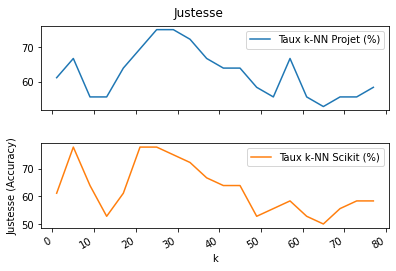

In [30]:
affichage_justesse('Taux k-NN Projet (%)','Taux k-NN Scikit (%)')

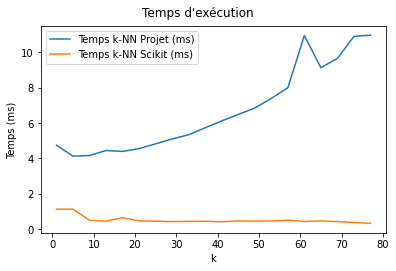

In [31]:
affichage_Temps_exe('Temps k-NN Projet (ms)','Temps k-NN Scikit (ms)')

In [32]:
#Detail du Justesse et Temps d'execution
#voir conclusion
headers_wj=["DataSets:load_wine(Justesse)","K","Version KNN sklearn Justesse", "Version KNN projet Justesse"]
headers_wt=["         (Temps d'execution)","K","KNN sklearn Temps d'execution", "KNN projet Temps d'execution"]
Datas_wj=[("",k,js,jp) for k,js,jp in zip(k_range,Taux_k_NN_Scikit,Taux_k_NN_Projet)]
Datas_wt=[("",k,ts,tp) for k,ts,tp in zip(k_range,Temps_k_NN_Scikit,Temps_k_NN_Projet)]

## 4) Deuxième dataset:load_digits()

In [33]:
# Chargement du jeu de données et création d'une structure DataFrame Pandas
df = sklearn_to_df_1(datasets.load_digits())

In [34]:
print(datasets.load_digits().DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [35]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,13.0,15.0,10.0,15.0,5.0,0.0,0.0,3.0,15.0,2.0,0.0,11.0,8.0,0.0,0.0,4.0,12.0,0.0,0.0,8.0,8.0,0.0,0.0,5.0,8.0,0.0,0.0,9.0,8.0,0.0,0.0,4.0,11.0,0.0,1.0,12.0,7.0,0.0,0.0,2.0,14.0,5.0,10.0,12.0,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,9.0,0.0,0.0,0.0,0.0,3.0,15.0,16.0,6.0,0.0,0.0,0.0,7.0,15.0,16.0,16.0,2.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,3.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,3.0,16.0,15.0,14.0,0.0,0.0,0.0,0.0,8.0,13.0,8.0,16.0,0.0,0.0,0.0,0.0,1.0,6.0,15.0,11.0,0.0,0.0,0.0,1.0,8.0,13.0,15.0,1.0,0.0,0.0,0.0,9.0,16.0,16.0,5.0,0.0,0.0,0.0,0.0,3.0,13.0,16.0,16.0,11.0,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,13.0,6.0,15.0,4.0,0.0,0.0,0.0,2.0,1.0,13.0,13.0,0.0,0.0,0.0,0.0,0.0,2.0,15.0,11.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,12.0,12.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0,8.0,0.0,0.0,0.0,8.0,4.0,5.0,14.0,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,8.0,0.0,0.0,0.0,0.0,0.0,1.0,13.0,6.0,2.0,2.0,0.0,0.0,0.0,7.0,15.0,0.0,9.0,8.0,0.0,0.0,5.0,16.0,10.0,0.0,16.0,6.0,0.0,0.0,4.0,15.0,16.0,13.0,16.0,1.0,0.0,0.0,0.0,0.0,3.0,15.0,10.0,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [36]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,target
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,10.382304,11.979410,10.279354,8.175849,1.846411,0.107958,0.002782,2.601558,9.903172,6.992766,7.097941,7.806344,1.788536,0.050083,0.001113,2.469672,9.091263,8.821369,9.927101,7.551475,2.317752,0.002226,0.0,2.339455,7.667223,9.071786,10.301614,8.744018,2.909293,0.0,0.008904,1.583751,6.881469,7.228158,7.672231,8.236505,3.456316,0.027268,0.007234,0.704508,7.506956,9.539232,9.416249,8.758486,3.725097,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496,4.490818
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,5.421456,3.977543,4.782681,6.052960,3.586321,0.827915,0.062368,3.576301,5.690767,5.802662,6.175729,6.197322,3.259870,0.438597,0.033352,3.146532,6.192038,5.882936,6.152093,5.872556,3.686456,0.047140,0.0,3.480372,6.324687,6.268391,5.933490,5.870648,3.537283,0.0,0.145185,2.981816,6.537955,6.441378,6.259511,5.695527,4.330951,0.307356,0.204223,1.746153,5.644496,5.226948,5.302048,6.031154,4.919406,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122,2.865304
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,9.000000,7.000000,2.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,3.000000,4.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,3.000000,6.000000,3.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,2.000000,5.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000,2.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,12.000000,13.000000,11.000000,9.000000,0.000000,0.000000,0.000000,1.000000,12.000000,6.000000,6.000000,8.000000,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,12.000000,7.000000,0.000000,0.000000,0.0,0.000000,8.000000,10.000000,13.000000,10.000000,1.000000,0.0,0.000000,0.000000,6.000000,7.000000,8.000000,9.000000,1.000000,0.000000,0.000000,0.000000,8.000000,10.000000,10.000000,10.000000,1.000000,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000,4.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,15.000000,16.000000,15.000000,14.000000,2.00000

In [37]:
df.corr() #Presente la correlation entre les variable et la target afin de prendre les bon variables caractéristiques

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,target
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,1.000000,0.556618,0.207814,-0.018761,0.060776,0.048388,-0.038927,0.032320,0.556372,0.224522,-0.109056,0.027908,-0.063983,-0.029973,-0.043697,-0.005109,0.213586,-0.113581,-0.105882,0.096254,-0.170070,-0.131330,-0.038266,-0.011183,-0.085911,-0.146383,0.072981,0.041083,-0.206318,-0.150754,-0.015824,NaN,-0.168296,-0.178488,0.044139,-0.059858,-0.235776,-0.173245,NaN,-0.020551,-0.124267,-0.142999,0.024242,-0.054716,-0.163272,-0.086466,-0.025736,-0.011871,0.225775,0.115281,0.020382,0.031455,-0.009579,0.030953,-0.045342,-0.007905,0.855610,0.555727,0.147646,-0.102349,-0.029870,0.026547,-0.043889,-0.051834
2,NaN,0.556618,1.000000,0.560180,-0.084235,0.043569,0.002841,-0.062278,0.022311,0.582259,0.631467,-0.286026,0.028798,0.063248,-0.089221,-0.100526,-0.016943,0.278864,-0.084251,-0.310726,0.208726,-0.086630,-0.217657,-0.118925,-0.036549,-0.153100,-0.310519,0.108378,0.199761,-0.193759,-0.192081,-0.051716,NaN,-0.344061,-0.396431,-0.055715,-0.120387,-0.279790,-0.183321,NaN,-0.067167,-0.268728,-0.341944,-0.157470,-0.203247,-0.189976,-0.069215,-0.064782,-0.038797,0.205796,0.262176,-0.042531,-0.051530,0.082865,0.050849,-0.003804,-0.025837,0.515276,0.937623,0.499840,-0.134754,-0.041183,0.072599,0.082523,-0.011836
3,NaN,0.207814,0.560180,1.000000,0.023938,-0.171377,-0.115732,-0.040139,0.035663,0.328344,0.596480,-0.002440,-0.068626,0.023163,-0.178804,-0.113830,0.022736,0.187811,0.040516,-0.360440,0.067943,-0.018315,-0.224892,-0.149758,-0.002639,-0.109260,-0.256293,-0.057108,0.090178,-0.183257,-0.141774,-0.067672,NaN,-0.227455,-0.224377,0.017606,-0.077963,-0.226493,-0.037223,NaN,-0.099624,-0.257836,-0.102203,-0.025302,-0.243829,-0.214744,0.089703,0.046919,-0.062799,0.015447,0.299762,0.279420,-0.180531,0.022396,0.139397,0.075335,-0.049085,0.175804,0.560326,0.767945,-0.065957,-0.054936,0.053437,0.081971,-0.011489
4,NaN,-0.018761,-0.084235,0.023938,1.000000,0.507731,0.127764,0.010065,0.042065,0.051657,0.013998,-0.135715,0.160268,0.390035,0.133625,0.014505,0.009911,0.036612,-0.124452,-0.155501,-0.029025,0.182671,0.078333,0.023887,0.008971,0.027043,-0.063194,0.036231,0.089654,0.122548,0.078057,0.012694,NaN,-0.028073,-0.015664,0.026593,0.069915,0.089086,0.051408,NaN,0.023642,-0.018364,-0.095154,-0.037575,0.051713,0.074574,-0.090120,-0.039530,0.024149,-0.020577,-0.165601,-0.043649,0.030314,-0.120561,-0.264968,-0.212220,0.017352,-0.047223,-0.020176,-0.008867,-0.082125,-0.215809,-0.250699,-0.215349,0.100801
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,NaN,-0.102349,-0.134754,-0.065957,-0.082125,-0.351146,-0.383522,-0.178243,0.048996,-0.000604,-0.077451,0.046670,0.015946,-0.199519,-0.298199,-0.100317,0.021630,0.036393,0.119076,0.207694,0.002642,-0.120517,-0.079916,-0.002784,0.008059,0.029233,0.083202,0.066731,-0.108922,-0.163125,-0.144672,0.001828,NaN,0.020895,-0.071784,-0.183403,-0.181357,0.018534,0.023764,NaN,0.031133,0.042396,0.144650,-0.225523,-0.257238,0.325224,0.385285,0.065117,0.018501,0.078370,0.276738,-0.230884,0.062677,0.584631,0.394280,0.105101,0.005697,-0.117908,-0.207957,0.058390,1.000000,0.609515,0.243305,0.103015,-0.196083
61,NaN,-0.029870,-0.041183,-0.054936,-0.215809,-0.268818,-0.304111,-0.141174,0.033409,0.071488,-0.031067,-0.095718,-0.002852,-0.131565,-0.279800,-0.136796,0.012376,0.052271,-0.016898,0.077486,0.103847,-0.078995,-0.224470,-0.107306,-0.038275,-0.150601,-0.114

In [38]:
# Récupération des valeurs de variables caractéristiques (deux dimensions)
#qui ont une tres grande correlation avec la variable target
xd=df.loc[:,27]
yd=df.loc[:,28]

In [39]:
a=list(zip(xd,yd)) # liste de tuples

In [40]:
# Récupération des valeurs de la variable à estimer
classe=df.loc[:,"target"]

**Le bon rondom state**

In [41]:
#ici on prends 16000 combinaison(Vu que la datset est grand) afin de prendre le bon rondom state 
#rsf c'est le bon random state a utiliser dans train_test_split
Start_Time= time.time()
rsf=rs(20000)
End_Time= time.time()
print(End_Time-Start_Time,"s")
print(rsf)

4666.574074983597 s
5695


**Construction des ensembles d'apprentissage et de test avec le bon rondom state**

In [42]:
# Construction des ensembles d'apprentissage et de test
# En général, 20 % des données pour le test.
# la même proportion pour chaque classe.
# paramètre random_state = rsf entier. Ce nombre sert pour le même tirage.
xy_train, xy_test, lab_train, lab_test = train_test_split(a, classe, test_size=0.2, random_state=rsf,
stratify=classe)

**knn sklearn**

In [43]:
"""La liste scores_list coontient le retour de la fonction kNN_Scikit  """
"""La liste Taux_k_NN_Scikit contient la justesse pour tout les valeurs de k"""
"""La liste Temps_k_NN_Scikit contient le temps d'execution pour tout les valeurs de k"""
scores_list=[kNN_Scikit(k,xy_train, lab_train, xy_test, lab_test) for k in k_range]
Taux_k_NN_Scikit=[scores_list[i][0] for i in range(len(scores_list)) ]
Temps_k_NN_Scikit=[scores_list[i][1] for i in range(len(scores_list)) ]

**le bon k: sklearn**

In [44]:
#retourne le bon k pour le model knn sklearn
bon_k(Taux_k_NN_Scikit,Temps_k_NN_Scikit,k_range)

41

**knn algo amelioration**

In [45]:
"""La liste scores_list_pj coontient le retour de la fonction k_NN_Projet  """
"""La liste Taux_k_NN_Projet contient la justesse pour tout les valeurs de k"""
"""La liste Temps_k_NN_Projet contient le temps d'execution pour tout les valeurs de k"""
"""Afin d'avoire un optimum temps d'execution je tranfsorme le lab_test(une serie), lab_train(une serie)  en liste"""
lab_test_p=[lab_test.iloc[i] for i in range(len(lab_test))]
lab_train_p=[lab_train.iloc[i] for i in range(len(lab_train))]
scores_list_pj=[k_NN_Projet(k,xy_train, lab_train_p, xy_test, lab_test_p) for k in k_range]
Taux_k_NN_Projet =[scores_list_pj[i][0] for i in range(len(scores_list_pj)) ]
Temps_k_NN_Projet=[scores_list_pj[i][1] for i in range(len(scores_list_pj)) ]

**le bon k: projet**

In [46]:
#retourne le bon k pour le model knn projet
bon_k(Taux_k_NN_Projet,Temps_k_NN_Projet,k_range)

69

**plotting**

In [47]:
# Table des résultats
res = pd.DataFrame({'Taux k-NN Projet (%)':Taux_k_NN_Projet,'Taux k-NN Scikit (%)':Taux_k_NN_Scikit,'Temps k-NN Projet (ms)':Temps_k_NN_Projet,
'Temps k-NN Scikit (ms)':Temps_k_NN_Scikit},index=k_range)


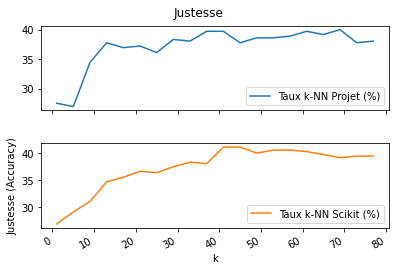

In [48]:
affichage_justesse('Taux k-NN Projet (%)','Taux k-NN Scikit (%)')

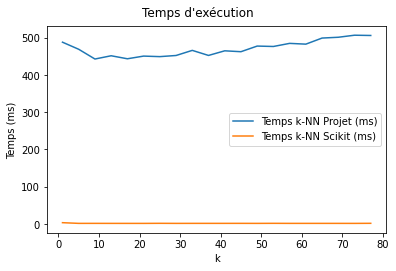

In [49]:
affichage_Temps_exe('Temps k-NN Projet (ms)','Temps k-NN Scikit (ms)')

In [50]:
#Detail du Justesse et Temps d'execution
#voir conclusion
headers_dj=["DataSets:load_digits(Justesse)","K","Version KNN sklearn Justesse", "Version KNN projet Justesse"]
headers_dt=["           (Temps d'execution)","K","KNN sklearn Temps d'execution", "KNN projet Temps d'execution"]
Datas_dj=[("",k,js,jp) for k,js,jp in zip(k_range,Taux_k_NN_Scikit,Taux_k_NN_Projet)]
Datas_dt=[("",k,ts,tp) for k,ts,tp in zip(k_range,Temps_k_NN_Scikit,Temps_k_NN_Projet)]

## 5) Troisieme dataset(Real): fetch_covtype()

Discussion: Dans cette troisieme data qui est une data réel de 581012 sample. 
Je me suis confronté a un challenge qui est le temps d'execution: 
Si je travaille sur l'integralité du datset (pour l'execution de cette partie avec tout les hyper parametre ca peut prendre des jours!)
C'est pour cette raison que je prend juste 5% de la dataset qui (29050 sample).
Meme avec ce pourcentage l'execution de cette partie prends un peu pret 3h ou 4h.

In [51]:
# Chargement du jeu de données et création d'une structure DataFrame Pandas
df = sklearn_to_df_1(datasets.fetch_covtype())

In [52]:
print(datasets.fetch_covtype().DESCR)

.. _covtype_dataset:

Forest covertypes
-----------------

The samples in this dataset correspond to 30×30m patches of forest in the US,
collected for the task of predicting each patch's cover type,
i.e. the dominant species of tree.
There are seven covertypes, making this a multiclass classification problem.
Each sample has 54 features, described on the
`dataset's homepage <https://archive.ics.uci.edu/ml/datasets/Covertype>`__.
Some of the features are boolean indicators,
while others are discrete or continuous measurements.

**Data Set Characteristics:**

    =================   ============
    Classes                        7
    Samples total             581012
    Dimensionality                54
    Features                     int
    =================   ============

:func:`sklearn.datasets.fetch_covtype` will load the covertype dataset;
it returns a dictionary-like object
with the feature matrix in the ``data`` member
and the target values in ``target``.
The dataset will be d

In [53]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,target
0,2596.0,51.0,3.0,258.0,0.0,510.0,221.0,232.0,148.0,6279.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,2590.0,56.0,2.0,212.0,-6.0,390.0,220.0,235.0,151.0,6225.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
2,2804.0,139.0,9.0,268.0,65.0,3180.0,234.0,238.0,135.0,6121.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3,2785.0,155.0,18.0,242.0,118.0,3090.0,238.0,238.0,122.0,6211.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4,2595.0,45.0,2.0,153.0,-1.0,391.0,220.0,234.0,150.0,6172.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5


In [54]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,target
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,0.448865,0.051434,0.436074,0.063627,0.005217,0.012952,0.008301,0.021335,0.002749,0.011316,0.000181,0.000308,0.001974,0.056168,0.021359,0.051584,0.030001,0.001031,0.000005,0.004897,0.005890,0.003268,0.006921,0.015936,0.001442,0.057439,0.099399,0.036622,0.000816,0.004456,0.001869,0.001628,0.198356,0.051927,0.044175,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,2.051471
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,0.497379,0.220882,0.495897,0.244087,0.072039,0.113066,0.090731,0.144499,0.052356,0.105775,0.013442,0.017550,0.044387,0.230245,0.144579,0.221186,0.170590,0.032092,0.002272,0.069804,0.076518,0.057077,0.082902,0.125228,0.037950,0.232681,0.299197,0.187833,0.028551,0.066605,0.043193,0.040318,0.398762,0.221879,0.205483,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,1.396504
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.

In [55]:
df.corr() #Presente la correlation entre les variable et la target afin de prendre les bon variables caractéristiques

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,target
0,1.000000,0.015735,-0.242697,0.306229,0.093306,0.365559,0.112179,0.205887,0.059148,0.148022,0.131838,0.238164,0.066550,-0.619374,-0.204512,-0.187677,-0.182463,-0.183521,-0.150376,-0.214606,-0.002252,-0.003021,-0.060915,-0.428746,-0.134227,-0.118905,-0.043984,-0.080825,-0.007153,-0.059446,-0.111028,-0.081811,0.033144,-0.043128,0.017557,0.158959,0.124356,0.053582,0.028753,-0.016657,0.035254,-0.029270,0.074327,-0.026667,0.070405,0.167077,0.070633,0.011731,0.083005,0.021107,0.035433,0.217179,0.193595,0.212612,-0.269554
1,0.015735,1.000000,0.078728,0.017376,0.070305,0.025121,-0.579273,0.336103,0.646944,-0.109172,-0.140123,0.055988,0.074904,0.082687,-0.007574,-0.005649,-0.002730,0.017212,0.008938,0.010766,-0.005052,-0.003366,-0.020800,0.049835,-0.064344,-0.070209,0.054544,0.007597,-0.002660,0.007846,-0.000168,-0.028353,-0.003635,-0.029440,0.032998,0.021578,0.013676,0.018164,-0.003265,-0.010661,0.011328,0.027535,-0.062181,-0.028922,0.001763,0.056233,0.019163,0.010861,-0.021991,0.002281,-0.020398,0.017706,0.008294,-0.005866,0.017080
2,-0.242697,0.078728,1.000000,-0.010607,0.274976,-0.215914,-0.327199,-0.526911,-0.175854,-0.185662,-0.234576,-0.036253,0.125663,0.255503,0.107847,-0.018553,0.125497,0.131847,0.072311,0.003673,-0.015661,-0.023359,-0.032752,0.244037,-0.050894,-0.169300,0.192423,0.000228,0.001081,-0.034791,-0.040208,-0.045851,-0.083743,-0.077582,-0.025461,-0.053396,-0.207397,0.082434,0.026364,-0.021449,0.043695,0.067052,-0.082941,0.075864,-0.034610,-0.133504,0.208942,-0.011002,-0.022228,0.002918,0.007848,-0.072208,0.093602,0.025637,0.148285
3,0.306229,0.017376,-0.010607,1.000000,0.606236,0.072030,-0.027088,0.046790,0.052330,0.051874,-0.097124,0.055726,0.122028,-0.100433,-0.035096,-0.011569,-0.041211,-0.049071,-0.009370,-0.012916,0.004751,-0.000795,-0.021935,-0.071653,0.001399,0.014628,-0.002032,-0.038478,-0.002667,-0.067448,-0.071435,-0.013340,-0.043236,-0.078088,-0.039953,-0.051424,-0.132244,0.021927,0.016099,0.013408,0.052384,0.026210,-0.001025,-0.049960,0.073658,0.127217,0.101195,0.070268,-0.005231,0.033421,-0.006802,0.043031,0.031922,0.147020,-0.020317
4,0.093306,0.070305,0.274976,0.606236,1.000000,-0.046372,-0.166333,-0.110957,0.034902,-0.069913,-0.180710,-0.008709,0.146839,0.077792,0.015275,0.008954,0.008863,0.025066,0.026772,0.046259,-0.008485,-0.012915,-0.028476,0.055154,-0.020870,-0.044526,0.083482,-0.024281,-0.001744,-0.050909,-0.054191,-0.031692,-0.055635,-0.076727,-0.026116,-0.075679,-0.180098,0.037066,-0.013471,-0.011212,0.067086,0.071672,-0.075860,-0.011901,0.033609,0.039762,0.167091,0.060274,-0.006092,0.012955,-0.007520,-0.008629,0.043859,0.179006,0.081664
5,0.365559,0.025121,-0.215914,0.072030,-0.046372,1.000000,0.034349,0.189461,0.106119,0.331580,0.453913,-0.200411,-0.232933,-0.270349,-0.083585,-0.088026,-0.084988,-0.088524,-0.061607,-0.108328,0.020107,0.025805,-0.045813,-0.182955,-0.099293,0.054196,-0.054968,-0.033945,-0.003144,0.018083,-0.051825,-0.051243,0.068758,0.056595,-0.014890,0.046979,-0.007067,-0.032451,-0.034842,0.002521,0.003866,-0.032749,0.306324,0.077091,-0.058840,-0.089019,-0.082779,0.006390,-0.003000,0.007550,0.016313,0.079778,0.033762,0.016052,-0.153450
6,0.112179,-0.579273,-0.327199,-0.027088,-0.166333,0.034349,1.000000,0.010037,-0.780296,0.132669,0.201299,-0.006181,-0.100565,-0.200282,-0.000937,0.036253,0.039648,0.023812,-0.046514,-0.005665,0.003571,0.005000,0.021741,-0.223782,0.048371,0.092364,-0.073390,-0.010719,-0.000522,-0.006590,0.004700,0.031293,0.017103,0.024811,-0.014162,0.000252,0.036234,-0.112379,0.032783,0.027388,0.001638,-0.091435,0.081499,0.104003,-0.035114,0.006494,-0.064381,0.007154,0.027870,0.007865,0.010332,0.015108,-0.029620,-0.000016,-0.035415
7,0.205887,0.336103,-0.526911,0.046790,-0.110957,0.189461,0.010037,1.000000,0.594274,0.057329,0.028728,0.042392,0.048646,-0.195733,-0.052561,0.043250,0.002702,0.084397,-0.06

In [56]:
# Récupération des valeurs de variables caractéristiques (deux dimensions)
xd=df.loc[:29050,13]
yd=df.loc[:29050,23]

In [57]:
a=list(zip(xd,yd)) # liste de tuples

In [58]:
# Récupération des valeurs de la variable à estimer
classe=df.loc[:29050,"target"]

**Le bon rondom state**

In [59]:
#ici on prends 200 combinaison(Vu que la datset est grand) afin de prendre le bon rondom state 
#rsf c'est le bon random state a utiliser dans train_test_split
Start_Time= time.time()
rsf=rs(200)
End_Time= time.time()
print(End_Time-Start_Time,"s")
print(rsf)

5727.144320011139 s
22


**Construction des ensembles d'apprentissage et de test avec le bon rondom state**

In [60]:
# Construction des ensembles d'apprentissage et de test
# En général, 20 % des données pour le test.
# la même proportion pour chaque classe.
# paramètre random_state = rsf entier. Ce nombre sert pour le même tirage. Je prends 42 au hasard
xy_train, xy_test, lab_train, lab_test = train_test_split(a, classe, test_size=0.2, random_state=rsf,
stratify=classe)

**knn sklearn**

In [61]:
"""La liste scores_list coontient le retour de la fonction kNN_Scikit  """
"""La liste Taux_k_NN_Scikit contient la justesse pour tout les valeurs de k"""
"""La liste Temps_k_NN_Scikit contient le temps d'execution pour tout les valeurs de k"""
"""Ici un cas speciale je prends que deux valeur de k vu que la data est tres tres volumuneuse """
"""Ps: je vais laisser le code s'execute pour deux jours afin de vous presenter(Pour la soutenance) les resultat de cette data pour 20 valeur de k"""
scores_list=[kNN_Scikit(k,xy_train, lab_train, xy_test, lab_test) for k in k_range]
Taux_k_NN_Scikit=[scores_list[i][0] for i in range(len(scores_list)) ]
Temps_k_NN_Scikit=[scores_list[i][1] for i in range(len(scores_list)) ]

**le bon k: sklearn**

In [62]:
#retourne le bon k pour le model knn sklearn
bon_k(Taux_k_NN_Scikit,Temps_k_NN_Scikit,k_range)

69

**knn algo amelioration**

In [63]:
"""La liste scores_list_pj coontient le retour de la fonction k_NN_Projet  """
"""La liste Taux_k_NN_Projet contient la justesse pour tout les valeurs de k"""
"""La liste Temps_k_NN_Projet contient le temps d'execution pour tout les valeurs de k"""
"""Afin d'avoire un optimum temps d'execution je tranfsorme le lab_test(une serie), lab_train(une serie)  en liste"""
lab_test_p=[lab_test.iloc[i] for i in range(len(lab_test))]
lab_train_p=[lab_train.iloc[i] for i in range(len(lab_train))]
scores_list_pj=[k_NN_Projet(k,xy_train, lab_train_p, xy_test, lab_test_p) for k in k_range]
Taux_k_NN_Projet =[scores_list_pj[i][0] for i in range(len(scores_list_pj)) ]
Temps_k_NN_Projet=[scores_list_pj[i][1] for i in range(len(scores_list_pj)) ]

**le bon k: projet**

In [64]:
#retourne le bon k pour le model knn projet
bon_k(Taux_k_NN_Projet,Temps_k_NN_Projet,k_range)

53

**plotting**

In [65]:
# Table des résultats
res = pd.DataFrame({'Taux k-NN Projet (%)':Taux_k_NN_Projet,'Taux k-NN Scikit (%)':Taux_k_NN_Scikit,'Temps k-NN Projet (ms)':Temps_k_NN_Projet,
'Temps k-NN Scikit (ms)':Temps_k_NN_Scikit},index=k_range)


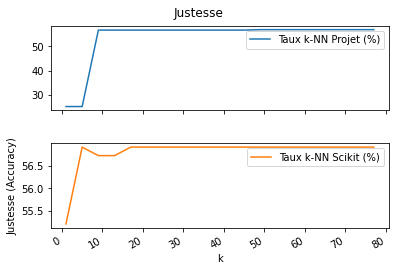

In [66]:
affichage_justesse('Taux k-NN Projet (%)','Taux k-NN Scikit (%)')

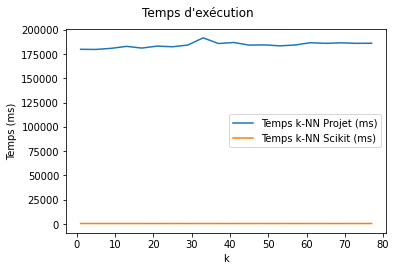

In [67]:
affichage_Temps_exe('Temps k-NN Projet (ms)','Temps k-NN Scikit (ms)')

In [68]:
#Detail du Justesse et Temps d'execution
#voir conclusion
headers_cj=["DataSets:fetch_covtype(Justesse)","K","Version KNN sklearn Justesse", "Version KNN projet Justesse"]
headers_ct=["             (Temps d'execution)","K","KNN sklearn Temps d'execution", "KNN projet Temps d'execution"]
Datas_cj=[("",k,js,jp) for k,js,jp in zip(k_range,Taux_k_NN_Scikit,Taux_k_NN_Projet)]
Datas_ct=[("",k,ts,tp) for k,ts,tp in zip(k_range,Temps_k_NN_Scikit,Temps_k_NN_Projet)]

## 6) Conclusion

In [69]:
#Justesse des trois dataset
print(tabulate(Datas_wj,headers=headers_wj))
print(tabulate(Datas_dj,headers=headers_dj))
print(tabulate(Datas_cj,headers=headers_cj))

DataSets:load_wine(Justesse)      K    Version KNN sklearn Justesse    Version KNN projet Justesse
------------------------------  ---  ------------------------------  -----------------------------
                                  1                         61.1111                        61.1111
                                  5                         77.7778                        66.6667
                                  9                         63.8889                        55.5556
                                 13                         52.7778                        55.5556
                                 17                         61.1111                        63.8889
                                 21                         77.7778                        69.4444
                                 25                         77.7778                        75
                                 29                         75                             75
                    

In [6]:
print("Dataset load_wine bon k= 25")
print("Dataset load_digits bon k= 41 ( KNN Sklearn) et k=69 (kNN PROJET)")
print("Dataset fetch_covtype bon k= 69 ( KNN Sklearn) et k=53 (kNN PROJET)")
print("le taux de la justesse n'atteint pas 90% a cause du choix de variable caractéristique(i l faut tenez en compte tout les variable et ceci a l'aide du PCA) et aussi du random state il faut faire tout les combinaison ce qui est impossible")

Dataset load_wine bon k= 25
Dataset load_digits bon k= 41 ( KNN Sklearn) et k=69 (kNN PROJET)
Dataset fetch_covtype bon k= 69 ( KNN Sklearn) et k=53 (kNN PROJET)
le taux de la justesse n'atteint pas 90% a cause du choix de variable caractéristique(i l faut tenez en compte tout les variable et ceci a l'aide du PCA) et aussi du random state il faut faire tout les combinaison ce qui est impossible


In [70]:
#Temps d'execution des trois dataset
print(tabulate(Datas_wt,headers=headers_wt))
print(tabulate(Datas_dt,headers=headers_dt))
print(tabulate(Datas_ct,headers=headers_ct))

         (Temps d'execution)      K    KNN sklearn Temps d'execution    KNN projet Temps d'execution
------------------------------  ---  -------------------------------  ------------------------------
                                  1                         1.13201                          4.74787
                                  5                         1.13511                          4.13132
                                  9                         0.508547                         4.1678
                                 13                         0.453472                         4.45199
                                 17                         0.654697                         4.39978
                                 21                         0.465155                         4.55856
                                 25                         0.454664                         4.83108
                                 29                         0.431061                        

In [3]:
print("Resultat: Le KNN Sickit est mieux que KNN Projet en temps d'execution!")

Resultat: Le KNN Sickit est mieux que KNN Projet en temps d'execution!
